# Loading Libraries


In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Loading First Dataset

In [18]:
os.chdir('C:\\Users\\willy\\Downloads\\FinalProject')
#Loading the dataset
data = pd.read_csv('calories.csv')
data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


# Loading Second Dataset

In [19]:
#Loading the second dataset
exercise_data = pd.read_csv('exercise.csv')
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# Merging the Datasets

In [20]:
#Merging the two datasets on the 'User_ID' column
merged_data = pd.merge(data, exercise_data, on='User_ID')
merged_data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


# Checking Missing Values

In [21]:
#Missing Values
missing_values = merged_data.isnull().sum()
missing_values

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

# Histogram of the Calories Column

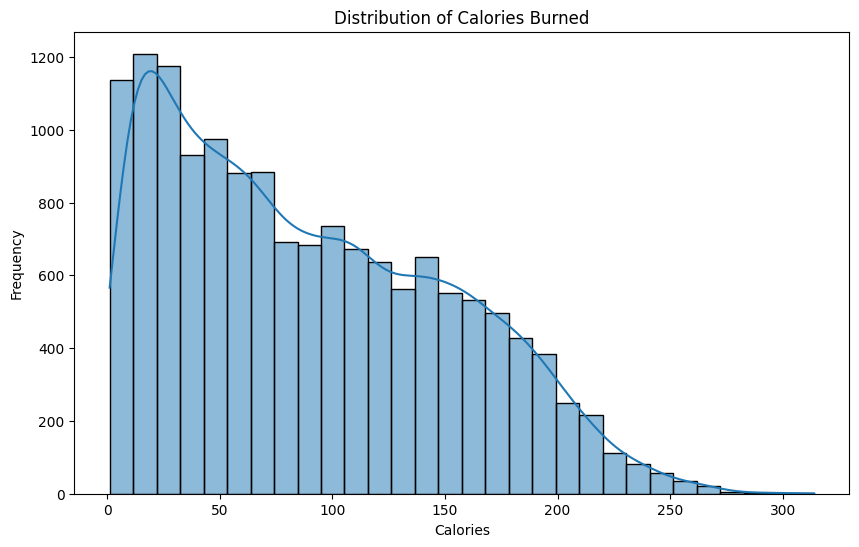

In [22]:
#Creating a histogram of the 'Calories' column
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Calories'], bins=30, kde=True)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot to Explore the Relationship between Duration and Calories Burned

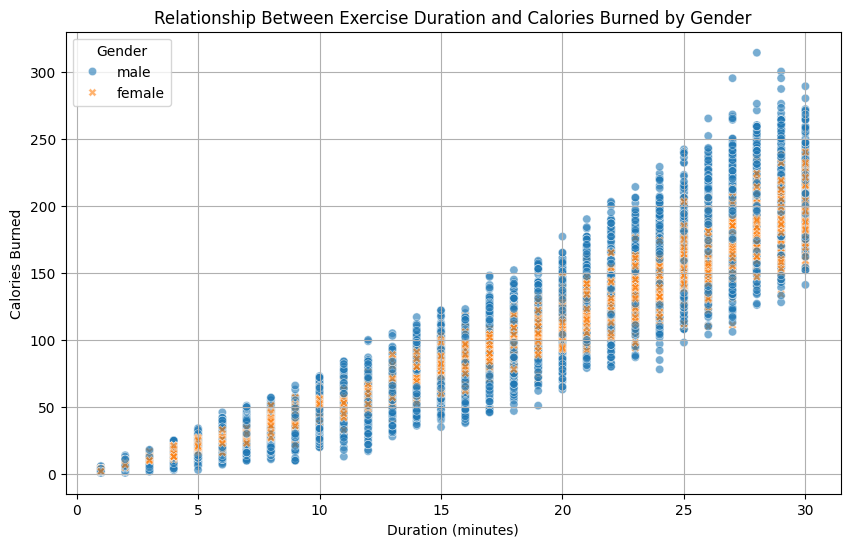

In [23]:
#Creating a scatter plot to explore the relationship between Duration and Calories burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Calories', data=merged_data, hue='Gender', style='Gender', alpha=0.6)
plt.title('Relationship Between Exercise Duration and Calories Burned by Gender')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

# Boxplot for Comparing the Heart Rate Across Different Genders During Exercise

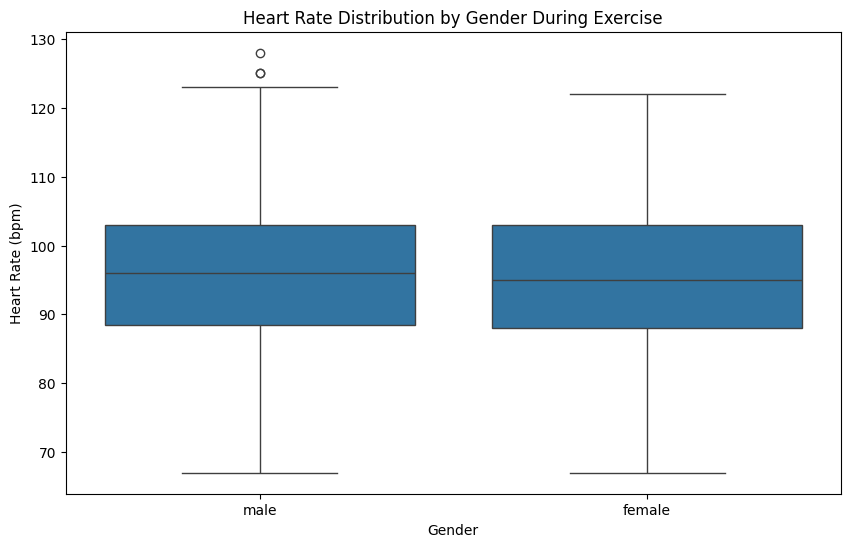

In [24]:
#Creating a boxplot to compare the Heart Rate across different Genders during exercise
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Heart_Rate', data=merged_data)
plt.title('Heart Rate Distribution by Gender During Exercise')
plt.xlabel('Gender')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# Correlation Matrix/Heatmap

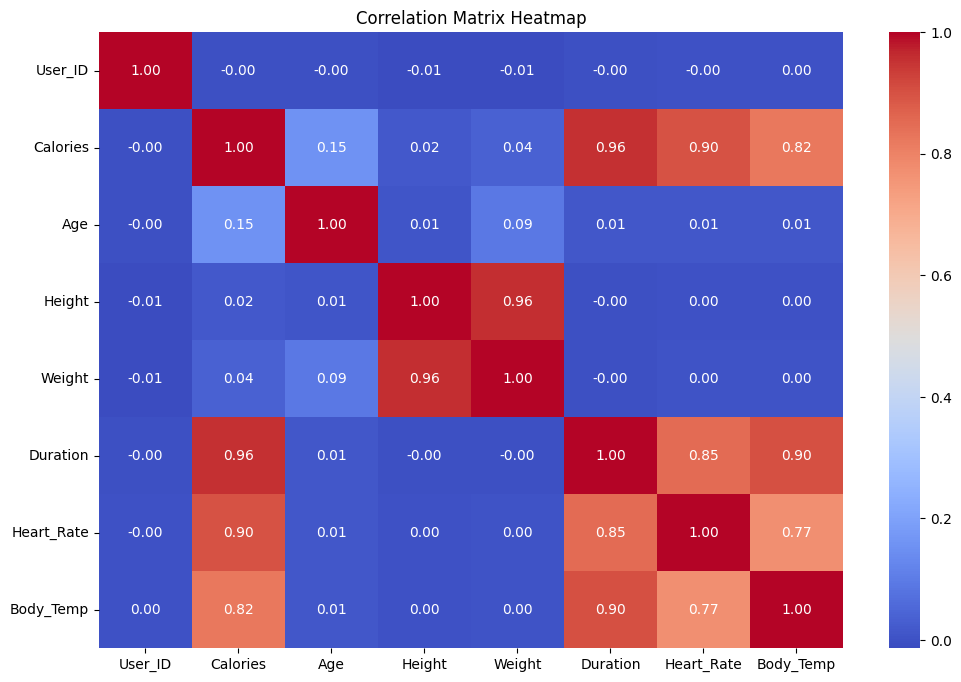

In [25]:
# Select only numeric columns
numeric_data = merged_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Dropping Useless Column (User_ID) from the Dataset

In [26]:
#Dropping the 'User_ID' column from the merged dataset
merged_data_dropped = merged_data.drop('User_ID', axis=1)
merged_data_dropped.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


# Linear Regression

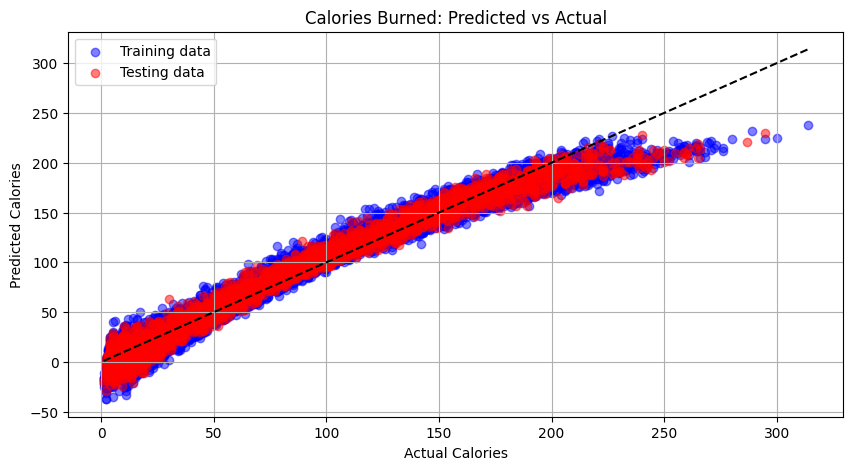

(0.9671621074066676, 0.9672937151257295)

In [27]:
# Encode 'Gender' and split data into features and target
merged_data_dropped['Gender'] = merged_data_dropped['Gender'].apply(lambda x: 1 if x == 'male' else 0)
X = merged_data_dropped.drop('Calories', axis=1)
y = merged_data_dropped['Calories']
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Creating a Linear Regression model and fit it to the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
#Predictions on training and testing data
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
#Calculating training and testing accuracy using R^2 score
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)
#Training vs Testing plot
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data', alpha=0.5)
plt.scatter(y_test, y_test_pred, color='red', label='Testing data', alpha=0.5)
plt.title('Calories Burned: Predicted vs Actual')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.legend()
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.grid(True)
plt.show()
(train_accuracy, test_accuracy)

# Random Forest Regressor

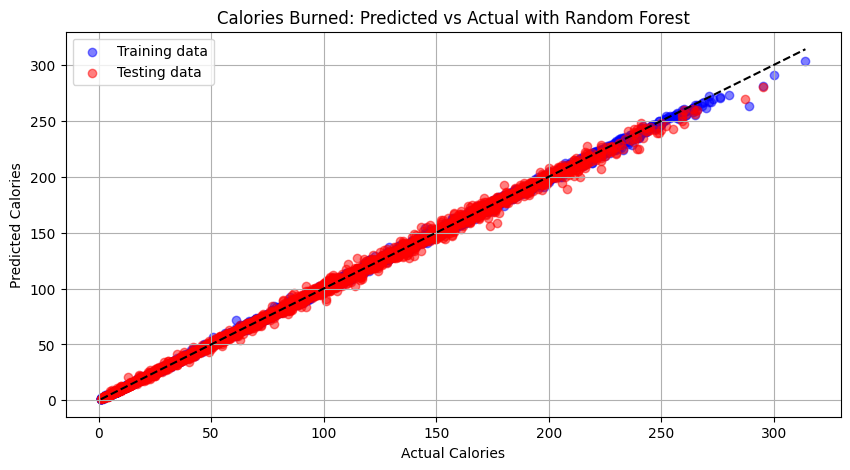

(0.9996877292400479, 0.9982158297720679)

In [28]:
#Creating a Random Forest Regressor model and fit it to the training data
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
#Predictions on training and testing data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
#Calculating training and testing accuracy using R^2 score
train_accuracy_rf = r2_score(y_train, y_train_pred_rf)
test_accuracy_rf = r2_score(y_test, y_test_pred_rf)# Training vs Testing plot
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred_rf, color='blue', label='Training data', alpha=0.5)
plt.scatter(y_test, y_test_pred_rf, color='red', label='Testing data', alpha=0.5)
plt.title('Calories Burned: Predicted vs Actual with Random Forest')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.legend()
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.grid(True)
plt.show()
(train_accuracy_rf, test_accuracy_rf)


# Gradient Boosting Regressor

In [29]:
#Creating a Gradient Boosting Regressor model and fit it to the training data
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)
#Predictions on training and testing data
y_train_pred_gbm = gbm_model.predict(X_train)
y_test_pred_gbm = gbm_model.predict(X_test)
#Calculating training and testing accuracy using R^2 score
train_accuracy_gbm = r2_score(y_train, y_train_pred_gbm)
test_accuracy_gbm = r2_score(y_test, y_test_pred_gbm)